<div style="display: flex; align-items: center; justify-content: space-between; border-bottom: 3px solid #D0D0D0; padding: 10px; font-family: Arial, sans-serif;">
  <!-- Logo -->
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/Uoc_masterbrand_vertical.png" alt="Logo" style="width: 150px; height: auto;">

  <!-- Detalles -->
  <div style="text-align: right; line-height: 1.6; margin-left: 20px; margin-right: 80px">
    <p style="margin: 0; font-size: 1.2em; font-weight: bold; color: #333;">Proyecto: <span style="color: #878787;">Práctica - Parte 2</span></p>
    <p style="margin: 0; font-size: 1em; font-weight: bold; color: #333;">Notebook: <span style="color: #878787;">Visualizaciones de prueba de actividades y calidad del sueño</span></p>
    <p style="color: #878787;">Juan Luis González Rodríguez - Visualización de datos</span></p>
  </div>
</div>

Se analiza como afecta el nivel de estrés y ansiedad a la calidad del sueño de los usuarios.

# 0. Librerías

In [618]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# 1. Carga de datos

In [619]:
activity_path = os.path.join('..', '0_data', 'clean_MMASH', 'activity_clean.pkl')
df_activity = pd.read_pickle(activity_path)

sleep_path = os.path.join('..', '0_data', 'clean_MMASH', 'sleep_clean.pkl')
df_sleep = pd.read_pickle(sleep_path)

Se visualizan los datos de actividad y sueño de los participantes en el estudio MMASH.

In [620]:
df_activity

,User,Activity,Start,End,Day,Duration,Start_datetime,End_datetime
0,user_1,Tumbado,10:00,10:22,1,0 days 00:22:00,1900-01-01 10:00:00,1900-01-01 10:22:00
1,user_1,Pant. grande,10:37,10:40,1,0 days 00:03:00,1900-01-01 10:37:00,1900-01-01 10:40:00
2,user_1,Cafeína,10:40,10:45,1,0 days 00:05:00,1900-01-01 10:40:00,1900-01-01 10:45:00
3,user_1,Mov. pesado,10:55,11:00,1,0 days 00:05:00,1900-01-01 10:55:00,1900-01-01 11:00:00
4,user_1,Tumbado,11:00,11:20,1,0 days 00:20:00,1900-01-01 11:00:00,1900-01-01 11:20:00
...,...,...,...,...,...,...,...,...
429,user_22,Mov. pesado,21:00,21:40,1,0 days 00:40:00,1900-01-01 21:00:00,1900-01-01 21:40:00
430,user_22,Sentado,22:30,00:10,1,0 days 01:40:00,1900-01-01 22:30:00,1900-01-01 00:10:00
431,user_22,Fumando,23:20,23:30,1,0 days 00:10:00,1900-01-01 23:20:00,1900-01-01 23:30:00
432,user_22,Tumbado,00:20,00:40,2,0 days 00:20:00,1900-01-02 00:20:00,1900-01-02 00:40:00


Se combinan los 2 registros del usuario 1 en el dataframe df_sleep

In [621]:
df_sleep[df_sleep['User'] == 'user_1']

,User,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,In Bed DateTime,Out Bed DateTime,Efficiency_bin
0,user_1,2,00:46,2,03:31,2,00:46,0,87.27,165,144,21,9,2.33,9.091,10.0,19.091,1900-01-02 00:46:00,1900-01-02 03:31:00,Buena
1,user_1,2,03:57,2,07:30,2,03:57,0,92.02,213,196,17,9,1.89,8.920,0.0,8.920,1900-01-02 03:57:00,1900-01-02 07:30:00,Buena


In [622]:

# Se combinan los 2 registros del usuario 1,
# Se suma Number of Awakenings, Wake After Sleep Onset (WASO), Total Minutes in Bed, Total Sleep Time (TST), de las otras columnas se toma el promedio o la moda
df_sleep_user_1 = pd.DataFrame({
    'User': ['user_1'],
    'In Bed Date': df_sleep[df_sleep['User'] == 'user_1']['In Bed Date'].min(),
    'In Bed Time': df_sleep[df_sleep['User'] == 'user_1']['In Bed Time'].min(),
    'Out Bed Date': df_sleep[df_sleep['User'] == 'user_1']['Out Bed Date'].max(),
    'Out Bed Time': df_sleep[df_sleep['User'] == 'user_1']['Out Bed Time'].max(),
    'Onset Date': df_sleep[df_sleep['User'] == 'user_1']['Onset Date'].max(),
    'Onset Time': df_sleep[df_sleep['User'] == 'user_1']['Onset Time'].max(),
    'Latency': df_sleep[df_sleep['User'] == 'user_1']['Latency'].mean(),
    'Efficiency': round(df_sleep[df_sleep['User'] == 'user_1']['Total Sleep Time (TST)'].sum() * 100 / df_sleep[df_sleep['User'] == 'user_1']['Total Minutes in Bed'].sum(), 2),
    'Total Minutes in Bed': df_sleep[df_sleep['User'] == 'user_1']['Total Minutes in Bed'].sum(),
    'Total Sleep Time (TST)': df_sleep[df_sleep['User'] == 'user_1']['Total Sleep Time (TST)'].sum(),
    'Wake After Sleep Onset (WASO)': df_sleep[df_sleep['User'] == 'user_1']['Wake After Sleep Onset (WASO)'].sum(),
    'Number of Awakenings': df_sleep[df_sleep['User'] == 'user_1']['Number of Awakenings'].sum(),
    'Average Awakening Length': round(df_sleep[df_sleep['User'] == 'user_1']['Wake After Sleep Onset (WASO)'].sum() / df_sleep[df_sleep['User'] == 'user_1']['Number of Awakenings'].sum(),2),
    'Movement Index': df_sleep[df_sleep['User'] == 'user_1']['Movement Index'].mean(),
    'Fragmentation Index': df_sleep[df_sleep['User'] == 'user_1']['Fragmentation Index'].mean(),
    'Sleep Fragmentation Index': df_sleep[df_sleep['User'] == 'user_1']['Movement Index'].mean() + df_sleep[df_sleep['User'] == 'user_1']['Fragmentation Index'].mean(),
    'In Bed DateTime': df_sleep[df_sleep['User'] == 'user_1']['In Bed DateTime'].min(),
    'Out Bed DateTime': df_sleep[df_sleep['User'] == 'user_1']['Out Bed DateTime'].max(),
    'Efficiency_bin': df_sleep[df_sleep['User'] == 'user_1']['Efficiency_bin'].mode()[0],
})
print("Registro combinado del usuario 1")
display(df_sleep_user_1)

# Se eliminan los registros del usuario 1 en df_sleep
df_sleep = df_sleep[df_sleep['User'] != 'user_1']

# Se agrega el registro del usuario 1 al dataframe
df_sleep = pd.concat([df_sleep, df_sleep_user_1], ignore_index=True)

# Se reordena las filas por el número de usuario
df_sleep['User_num'] = df_sleep['User'].apply(lambda x: int(x.split('_')[1]))
df_sleep = df_sleep.sort_values('User_num')
df_sleep.drop(columns='User_num', inplace=True)
df_sleep.reset_index(drop=True, inplace=True)

print("Dataframe de sueño tras combinar el registro del usuario 1")
df_sleep

Registro combinado del usuario 1


,User,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,In Bed DateTime,Out Bed DateTime,Efficiency_bin
0,user_1,2,00:46,2,07:30,2,03:57,0.0,89.95,378,340,38,18,2.11,9.0055,5.0,14.0055,1900-01-02 00:46:00,1900-01-02 07:30:00,Buena


Dataframe de sueño tras combinar el registro del usuario 1


,User,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,In Bed DateTime,Out Bed DateTime,Efficiency_bin
0,user_1,2,00:46,2,07:30,2,03:57,0.0,89.95,378,340,38,18,2.11,9.0055,5.000,14.0055,1900-01-02 00:46:00,1900-01-02 07:30:00,Buena
1,user_2,2,00:50,2,06:22,2,00:54,4.0,73.49,332,244,84,18,4.67,15.0600,5.556,20.6160,1900-01-02 00:50:00,1900-01-02 06:22:00,Mala
2,user_3,1,22:29,2,05:52,1,22:32,3.0,79.23,443,351,89,16,5.56,18.9620,0.000,18.9620,1900-01-01 22:29:00,1900-01-02 05:52:00,Mala
3,user_4,2,00:57,2,07:10,2,01:01,4.0,85.52,373,319,50,28,1.79,8.8470,14.286,23.1330,1900-01-02 00:57:00,1900-01-02 07:10:00,Buena
4,user_5,1,23:56,2,06:42,1,23:56,0.0,85.71,406,348,58,21,2.76,11.5760,9.524,21.1000,1900-01-01 23:56:00,1900-01-02 06:42:00,Buena
5,user_6,2,02:27,2,09:02,2,02:27,0.0,84.30,395,333,62,20,3.10,10.6330,4.762,15.3950,1900-01-02 02:27:00,1900-01-02 09:02:00,Mala
6,user_7,2,00:28,2,08:02,2,00:28,0.0,75.33,454,342,112,31,3.61,17.4010,28.125,45.5260,1900-01-02 00:28:00,1900-01-02 08:02:00,Mala
7,user_8,2,00:17,2,07:13,2,00:20,3.0,80.77,416,336,77,27,2.85,17.3080,25.926,43.2340,1900-01-02 00:17:00,1900-01-02 07:13:00,Mala
8,user_9,2,00:30,2,11:00,2,00:33,3.0,91.75,630,578,49,4,12.25,8.0950,0.000,8.0950,1900-01-02 00:30:00,1900-01-02 11:00:00,Buena
9,user_10,2,02:40,2,08:09,2,02:44,4.0,75.08,329,247,78,13,6.00,20.6690,7.692,28.3610,1900-01-02 02:40:00,1900-01-02 08:09:00,Mala


# 2. Exploración de las visualizaciones

**¿Durmen mejor las personas que tienen más movimiento pesado que las que no?**

Se filtran todas registros de movimiento pesado anteriores al datetime de irse a dormir ese ususario

In [623]:
#DF con datos de movimientos pesados
df_mov_pesado = df_activity[df_activity['Activity'] == 'Mov. pesado']
n_registros = df_mov_pesado.shape[0]

# Se crea un df vacio para almacenar los movimientos pesados antes de irse a dormir
df_mov_pesado_before_sleep = pd.DataFrame(columns=df_mov_pesado.columns)

# Se eliminan los registros con registros posteriores al momento de irse a dormir ese ususario
for user in df_mov_pesado['User'].unique():
    df_mov_pesado_user = df_mov_pesado[df_mov_pesado['User'] == user]
    
    try:
        # Se obtiene la fecha y hora de irse a dormir
        in_bed_datetime = df_sleep[df_sleep['User'] == user]['In Bed DateTime'].values[0]
    except IndexError:
        print(f"El usuario {user} no tiene datos en df_sleep. Se omite.")
        continue

    # Se eliminan los registros con Start_datetime posteriores a in_bed_datetime
    df_mov_pesado_user = df_mov_pesado_user[df_mov_pesado_user['Start_datetime'] < in_bed_datetime]

    # Se añaden al df de movimientos pesados antes de dormir general
    df_mov_pesado_before_sleep = pd.concat([df_mov_pesado_before_sleep, df_mov_pesado_user], ignore_index=True)
    
print(f"Se han eliminado {n_registros - df_mov_pesado_before_sleep.shape[0]} registros de movimientos pesados posteriores a irse a dormir")

El usuario user_11 no tiene datos en df_sleep. Se omite.
Se han eliminado 15 registros de movimientos pesados posteriores a irse a dormir


/tmp/ipykernel_25592/891216237.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_mov_pesado_before_sleep = pd.concat([df_mov_pesado_before_sleep, df_mov_pesado_user], ignore_index=True)


In [624]:
df_mov_pesado = df_mov_pesado_before_sleep

Se ha detectado un registro extraño en la duración del Mov. Pesado del ususario 6

In [625]:
# Revisamos el ususario 6
df_mov_pesado[df_mov_pesado['User'] == 'user_6']

,User,Activity,Start,End,Day,Duration,Start_datetime,End_datetime
17,user_6,Mov. pesado,13:43,14:06,1,0 days 00:23:00,1900-01-01 13:43:00,1900-01-01 14:06:00
18,user_6,Mov. pesado,18:29,18:29,1,1 days 00:00:00,1900-01-01 18:29:00,1900-01-01 18:29:00
19,user_6,Mov. pesado,19:39,20:51,1,0 days 01:12:00,1900-01-01 19:39:00,1900-01-01 20:51:00


Se observa que hay un registro con duración de 1 día pero que en realidad debe ser 0 ya que empieza y termina el mismo día. Se procede a corregirlo eliminando el registro. en realidad debe ser 0 ya que empieza y termina el mismo día. Se procede a corregirlo eliminando el registro.

In [626]:
# Eliminamos el registro de la fila con indice 18
df_mov_pesado = df_mov_pesado.drop(18).reset_index(drop=True)

Se agrupan por usuario y se calcula la suma de la duración de los movimientos pesados.

In [627]:
# Se agrupan por usuario y se calcula la suma de la duración de los movimientos pesados.
df_mov_pesado = df_mov_pesado.groupby('User').agg({'Duration': 'sum'}).reset_index()
df_mov_pesado.rename(columns={'Duration': 'Total Heavy Movements Duration'}, inplace=True)

# Se rellena con 0 los usuarios que no tienen movimientos pesados (salvo el user_11 que no tiene datos de sueño
df_mov_pesado = df_sleep[['User']].merge(df_mov_pesado, on='User', how='left').fillna(0)
df_mov_pesado

,User,Total Heavy Movements Duration
0,user_1,0 days 02:10:00
1,user_2,0 days 00:52:00
2,user_3,0 days 00:45:00
3,user_4,0 days 01:50:00
4,user_5,0 days 01:50:00
5,user_6,0 days 01:35:00
6,user_7,0 days 03:00:00
7,user_8,0 days 01:05:00
8,user_9,0 days 02:00:00
9,user_10,0 days 01:30:00


In [628]:
# Se une el df de movimientos pesados con el df de sueño
df_sleep_1 = df_sleep.merge(df_mov_pesado, on='User', how='left')

df_mov_pesado_efficiency = df_sleep_1[['User', 'Efficiency', 'Total Heavy Movements Duration']].copy()
df_mov_pesado_efficiency.loc[:, 'Efficiency_bin'] = df_sleep_1['Efficiency_bin'].values

# Se convierte la Total Heavy Movements Duration a minutos como enteros
df_mov_pesado_efficiency.loc[:, 'Total Heavy Movements Duration'] = df_mov_pesado_efficiency['Total Heavy Movements Duration'].apply(lambda x: int(x.total_seconds() / 60))
df_mov_pesado_efficiency.rename(columns={'Total Heavy Movements Duration': 'Total Heavy Movements Duration (min)'}, inplace=True)

df_mov_pesado_efficiency

/tmp/ipykernel_25592/1858910011.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[130  52  45 110 110  95 180  65 120  90  90 150  50  70  90  94  25  95
  77  70  80]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  df_mov_pesado_efficiency.loc[:, 'Total Heavy Movements Duration'] = df_mov_pesado_efficiency['Total Heavy Movements Duration'].apply(lambda x: int(x.total_seconds() / 60))


,User,Efficiency,Total Heavy Movements Duration (min),Efficiency_bin
0,user_1,89.95,130,Buena
1,user_2,73.49,52,Mala
2,user_3,79.23,45,Mala
3,user_4,85.52,110,Buena
4,user_5,85.71,110,Buena
5,user_6,84.30,95,Mala
6,user_7,75.33,180,Mala
7,user_8,80.77,65,Mala
8,user_9,91.75,120,Buena
9,user_10,75.08,90,Mala


Se plotea un scatterplot de la duración de movimientos pesados vs la eficiencia del sueño

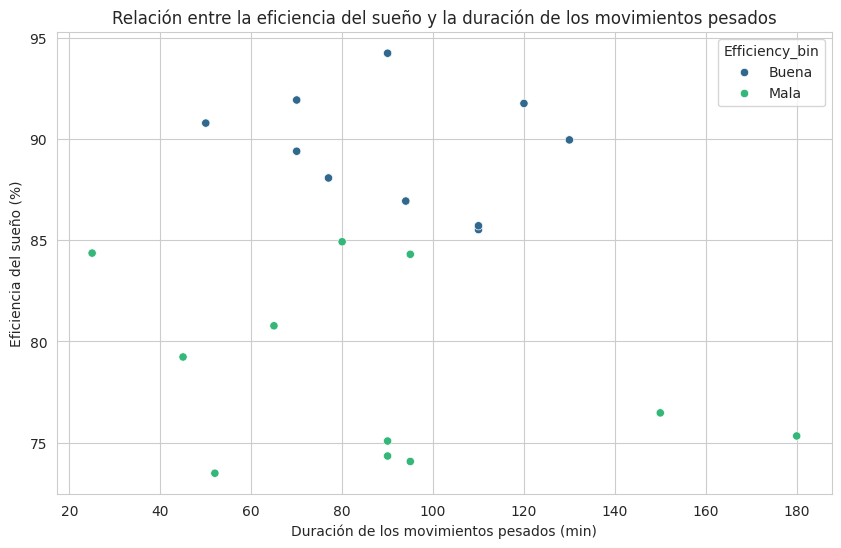

In [629]:
# Se configura el estilo
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

# Se grafica la relación entre la eficiencia del sueño y la duración de los movimientos pesados
sns.scatterplot(data=df_mov_pesado_efficiency, x='Total Heavy Movements Duration (min)', y='Efficiency', hue='Efficiency_bin', palette='viridis', ax=ax)

plt.title("Relación entre la eficiencia del sueño y la duración de los movimientos pesados")
plt.xlabel("Duración de los movimientos pesados (min)")
plt.ylabel("Eficiencia del sueño (%)")

plt.show()

**¿Durmen mejor las personas que tienen más movimiento medio y ligero que las que no?**

Se filtran todas registros de movimiento pesado anteriores al datetime de irse a dormir ese ususario

In [630]:
#DF con datos de movimientos pesados
df_movs = df_activity[df_activity['Activity'].isin(['Mov. medio', 'Mov. ligero'])]
n_registros = df_movs.shape[0]

# Se crea un df vacio para almacenar los movimientos ligero y medio antes de irse a dormir
df_movs_before_sleep = pd.DataFrame(columns=df_movs.columns)

# Se eliminan los registros con registros posteriores al momento de irse a dormir ese ususario
for user in df_movs['User'].unique():
    df_movs_user = df_movs[df_movs['User'] == user]
    
    try:
        # Se obtiene la fecha y hora de irse a dormir
        in_bed_datetime = df_sleep[df_sleep['User'] == user]['In Bed DateTime'].values[0]
    except IndexError:
        print(f"El usuario {user} no tiene datos en df_sleep. Se omite.")
        continue

    # Se eliminan los registros con Start_datetime posteriores a in_bed_datetime
    df_movs_user = df_movs_user[df_movs_user['Start_datetime'] < in_bed_datetime]

    # Se añaden al df de movimientos pesados antes de dormir general
    df_movs_before_sleep = pd.concat([df_movs_before_sleep, df_movs_user], ignore_index=True)
    
print(f"Se han eliminado {n_registros - df_movs_before_sleep.shape[0]} registros de movimientos ligeros y medios posteriores a irse a dormir")

Se han eliminado 3 registros de movimientos ligeros y medios posteriores a irse a dormir


/tmp/ipykernel_25592/4178673969.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_movs_before_sleep = pd.concat([df_movs_before_sleep, df_movs_user], ignore_index=True)


In [631]:
df_movs = df_movs_before_sleep

Se agrupan por usuario y se calcula la suma de la duración de los movimientos pesados.

In [632]:
# Se agrupan por usuario y se calcula la suma de la duración de los movimientos pesados.
df_movs = df_movs.groupby('User').agg({'Duration': 'sum'}).reset_index()
df_movs.rename(columns={'Duration': 'Total Movements Duration'}, inplace=True)

# Se rellena con 0 los usuarios que no tienen movimientos pesados (salvo el user_11 que no tiene datos de sueño)
df_movs = df_sleep[['User']].merge(df_movs, on='User', how='left').fillna(pd.Timedelta(0))

df_movs

,User,Total Movements Duration
0,user_1,0 days 00:20:00
1,user_2,0 days 00:17:00
2,user_3,0 days 01:05:00
3,user_4,0 days 00:00:00
4,user_5,0 days 00:00:00
5,user_6,0 days 00:15:00
6,user_7,0 days 00:00:00
7,user_8,0 days 01:15:00
8,user_9,0 days 01:00:00
9,user_10,0 days 00:40:00


In [633]:
# Se une el df de movimientos pesados con el df de sueño
df_sleep_1 = df_sleep.merge(df_movs, on='User', how='right')

df_movs_efficiency = df_sleep_1[['User', 'Efficiency', 'Total Movements Duration']].copy()
df_movs_efficiency.loc[:, 'Efficiency_bin'] = df_sleep_1['Efficiency_bin'].values

# Se convierte la Total Movements Duration a minutos como enteros
df_movs_efficiency.loc[:, 'Total Movements Duration'] = df_movs_efficiency['Total Movements Duration'].apply(lambda x: int(x.total_seconds() / 60))
df_movs_efficiency.rename(columns={'Total Movements Duration': 'Total Movements Duration (min)'}, inplace=True)

df_movs_efficiency

/tmp/ipykernel_25592/3268785046.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 20  17  65   0   0  15   0  75  60  40   0   0   0 120   0  70   0   0
  15   0   0]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  df_movs_efficiency.loc[:, 'Total Movements Duration'] = df_movs_efficiency['Total Movements Duration'].apply(lambda x: int(x.total_seconds() / 60))


,User,Efficiency,Total Movements Duration (min),Efficiency_bin
0,user_1,89.95,20,Buena
1,user_2,73.49,17,Mala
2,user_3,79.23,65,Mala
3,user_4,85.52,0,Buena
4,user_5,85.71,0,Buena
5,user_6,84.30,15,Mala
6,user_7,75.33,0,Mala
7,user_8,80.77,75,Mala
8,user_9,91.75,60,Buena
9,user_10,75.08,40,Mala


Se plotea un scatterplot de la duración de movimientos pesados vs la eficiencia del sueño

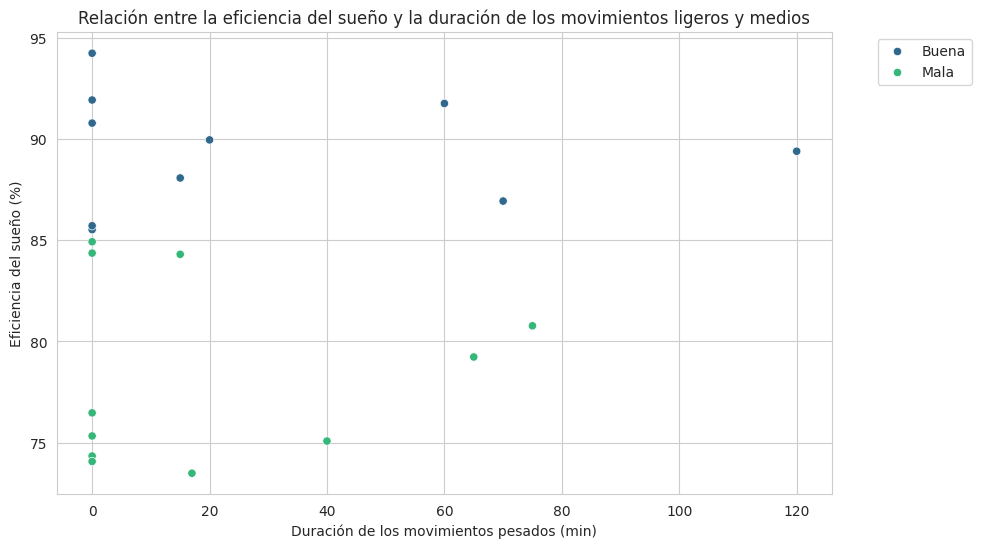

In [634]:
# Se configura el estilo
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

# Se grafica la relación entre la eficiencia del sueño y la duración de los movimientos pesados
sns.scatterplot(data=df_movs_efficiency, x='Total Movements Duration (min)', y='Efficiency', hue='Efficiency_bin', palette='viridis', ax=ax)

plt.title("Relación entre la eficiencia del sueño y la duración de los movimientos ligeros y medios")
plt.xlabel("Duración de los movimientos pesados (min)")
plt.ylabel("Eficiencia del sueño (%)")

# Se coloca la leyenda fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Alcohol y calidad del sueño**

In [635]:
#DF con datos de consumo de alcohol
df_alcohol = df_activity[df_activity['Activity'] == 'Alcohol']
n_registros = df_alcohol.shape[0]

# Se crea un df vacio para almacenar los consumos de alcohol antes de irse a dormir
df_alcohol_before_sleep = pd.DataFrame(columns=df_alcohol.columns)

# Se eliminan los registros con registros posteriores al momento de irse a dormir ese ususario
for user in df_alcohol['User'].unique():
    df_alcohol_user = df_alcohol[df_alcohol['User'] == user]
    
    try:
        # Se obtiene la fecha y hora de irse a dormir
        in_bed_datetime = df_sleep[df_sleep['User'] == user]['In Bed DateTime'].values[0]
    except IndexError:
        print(f"El usuario {user} no tiene datos en df_sleep. Se omite.")
        continue

    # Se eliminan los registros con Start_datetime posteriores a in_bed_datetime
    df_alcohol_user = df_alcohol_user[df_alcohol_user['Start_datetime'] < in_bed_datetime]

    # Se añaden al df de consumos de alcohol antes de dormir general
    df_alcohol_before_sleep = pd.concat([df_alcohol_before_sleep, df_alcohol_user], ignore_index=True)
    
print(f"Se han eliminado {n_registros - df_alcohol_before_sleep.shape[0]} registros de consumo de alcohol posteriores a irse a dormir")

El usuario user_11 no tiene datos en df_sleep. Se omite.
Se han eliminado 17 registros de consumo de alcohol posteriores a irse a dormir


/tmp/ipykernel_25592/4231010064.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_alcohol_before_sleep = pd.concat([df_alcohol_before_sleep, df_alcohol_user], ignore_index=True)


In [636]:
df_alcohol = df_alcohol_before_sleep
display(df_alcohol)

,User,Activity,Start,End,Day,Duration,Start_datetime,End_datetime
0,user_2,Alcohol,00:00,00:10,2,0 days 00:10:00,1900-01-02 00:00:00,1900-01-02 00:10:00
1,user_4,Alcohol,00:30,00:35,2,0 days 00:05:00,1900-01-02 00:30:00,1900-01-02 00:35:00
2,user_7,Alcohol,23:30,23:35,1,0 days 00:05:00,1900-01-01 23:30:00,1900-01-01 23:35:00
3,user_9,Alcohol,23:30,23:40,1,0 days 00:10:00,1900-01-01 23:30:00,1900-01-01 23:40:00
4,user_12,Alcohol,22:55,23:00,1,0 days 00:05:00,1900-01-01 22:55:00,1900-01-01 23:00:00
5,user_14,Alcohol,23:40,23:45,1,0 days 00:05:00,1900-01-01 23:40:00,1900-01-01 23:45:00
6,user_15,Alcohol,22:00,22:10,1,0 days 00:10:00,1900-01-01 22:00:00,1900-01-01 22:10:00
7,user_16,Alcohol,23:30,23:40,1,0 days 00:10:00,1900-01-01 23:30:00,1900-01-01 23:40:00
8,user_17,Alcohol,00:05,00:10,2,0 days 00:05:00,1900-01-02 00:05:00,1900-01-02 00:10:00
9,user_18,Alcohol,00:15,00:30,2,0 days 00:15:00,1900-01-02 00:15:00,1900-01-02 00:30:00


In [637]:
# Se agrupan por usuario y se calcula la suma de la duración de las ingestas de alcohol.
df_alcohol = df_alcohol.groupby('User').agg({'Duration': 'sum'}).reset_index()
df_alcohol.rename(columns={'Duration': 'Total Alcohol Duration'}, inplace=True)

# Se rellena con 0 los usuarios que no tienen consumos de alcohol (salvo el user_11 que no tiene datos de sueño)
df_alcohol = df_sleep[['User']].merge(df_alcohol, on='User', how='left').fillna(pd.Timedelta(0))

df_alcohol

,User,Total Alcohol Duration
0,user_1,0 days 00:00:00
1,user_2,0 days 00:10:00
2,user_3,0 days 00:00:00
3,user_4,0 days 00:05:00
4,user_5,0 days 00:00:00
5,user_6,0 days 00:00:00
6,user_7,0 days 00:05:00
7,user_8,0 days 00:00:00
8,user_9,0 days 00:10:00
9,user_10,0 days 00:00:00


In [638]:
# Se une el df de ingestas de alcohol con el df de sueño
df_sleep_1 = df_sleep.merge(df_alcohol, on='User', how='right')

df_alcohol_efficiency = df_sleep_1[['User', 'Efficiency', 'Total Alcohol Duration', 'Number of Awakenings', 'Sleep Fragmentation Index']].copy()
df_alcohol_efficiency.loc[:, 'Efficiency_bin'] = df_sleep_1['Efficiency_bin'].values

# Se convierte la Total Movements Duration a minutos como enteros
df_alcohol_efficiency.loc[:, 'Total Alcohol Duration'] = df_alcohol_efficiency['Total Alcohol Duration'].apply(lambda x: int(x.total_seconds() / 60))
df_alcohol_efficiency.rename(columns={'Total Alcohol Duration': 'Total Alcohol Duration (min)'}, inplace=True)

df_alcohol_efficiency

/tmp/ipykernel_25592/375247712.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0 10  0  5  0  0  5  0 10  0  5  0  5 10 10  5 15  5  5  0  0]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  df_alcohol_efficiency.loc[:, 'Total Alcohol Duration'] = df_alcohol_efficiency['Total Alcohol Duration'].apply(lambda x: int(x.total_seconds() / 60))


,User,Efficiency,Total Alcohol Duration (min),Number of Awakenings,Sleep Fragmentation Index,Efficiency_bin
0,user_1,89.95,0,18,14.0055,Buena
1,user_2,73.49,10,18,20.6160,Mala
2,user_3,79.23,0,16,18.9620,Mala
3,user_4,85.52,5,28,23.1330,Buena
4,user_5,85.71,0,21,21.1000,Buena
5,user_6,84.30,0,20,15.3950,Mala
6,user_7,75.33,5,31,45.5260,Mala
7,user_8,80.77,0,27,43.2340,Mala
8,user_9,91.75,10,4,8.0950,Buena
9,user_10,75.08,0,13,28.3610,Mala


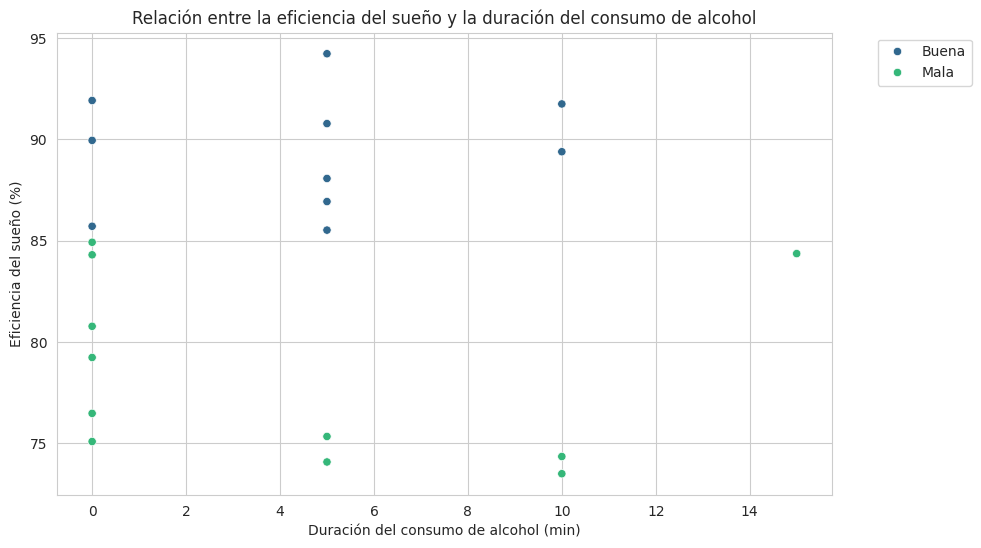

In [639]:
# Se configura el estilo
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

# Se grafica la relación entre la eficiencia del sueño y la duración del consumo de alcohol
sns.scatterplot(data=df_alcohol_efficiency, x='Total Alcohol Duration (min)', y='Efficiency', hue='Efficiency_bin', palette='viridis', ax=ax)

plt.title("Relación entre la eficiencia del sueño y la duración del consumo de alcohol")
plt.xlabel("Duración del consumo de alcohol (min)")
plt.ylabel("Eficiencia del sueño (%)")

# Se coloca la leyenda fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

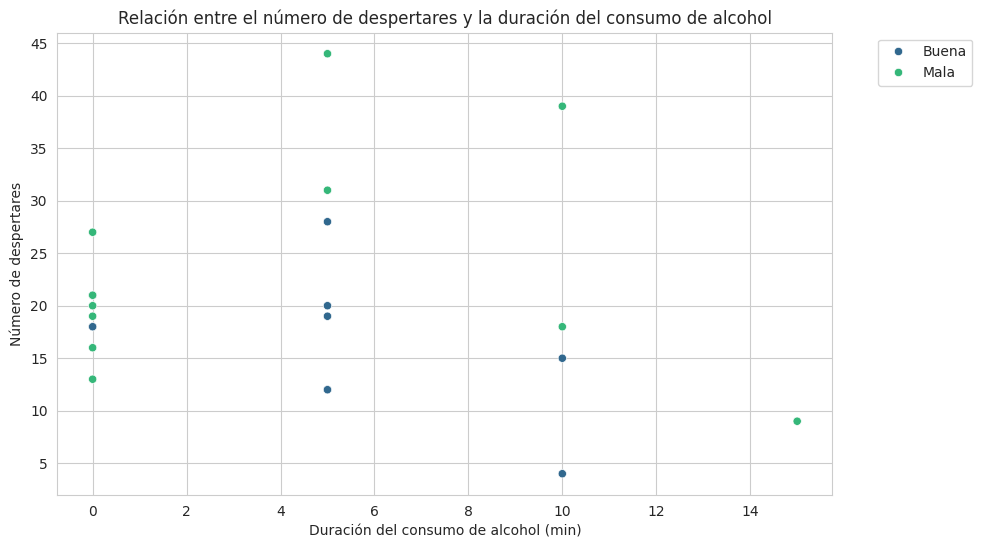

In [640]:
# Ploteamos la relacion entre el consumo de alcohol y el número de despertares
fig, ax = plt.subplots(figsize=(10, 6))

# Se grafica la relación entre la eficiencia del sueño y la duración del consumo de alcohol
sns.scatterplot(data=df_alcohol_efficiency, x='Total Alcohol Duration (min)', y='Number of Awakenings', hue='Efficiency_bin', palette='viridis', ax=ax)

plt.title("Relación entre el número de despertares y la duración del consumo de alcohol")
plt.xlabel("Duración del consumo de alcohol (min)")
plt.ylabel("Número de despertares")

# Se coloca la leyenda fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

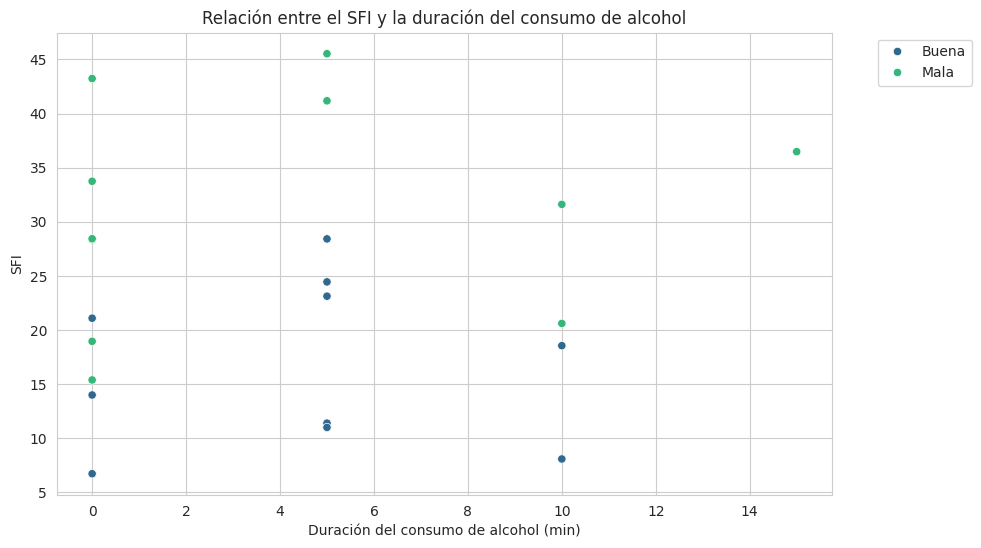

In [641]:
# Ploteamos la relacion entre el consumo de alcohol y SFI
fig, ax = plt.subplots(figsize=(10, 6))

# Se grafica la relación entre la eficiencia del sueño y la duración del consumo de alcohol
sns.scatterplot(data=df_alcohol_efficiency, x='Total Alcohol Duration (min)', y='Sleep Fragmentation Index', hue='Efficiency_bin', palette='viridis', ax=ax)

plt.title("Relación entre el SFI y la duración del consumo de alcohol")
plt.xlabel("Duración del consumo de alcohol (min)")
plt.ylabel("SFI")

# Se coloca la leyenda fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Uso de pantallas antes de dormir**

Se analiza el uso de pantallas el día previo a irse a dormir.

In [642]:
df_pantallas = df_activity[df_activity['Activity'].isin(['Pant. pequeña', 'Pant. grande'])]

n_registros = df_pantallas.shape[0]

# Se crea un df vacio para almacenar los movimientos ligero y medio antes de irse a dormir
df_pant = pd.DataFrame(columns=df_pantallas.columns)

# Se eliminan los registros con registros posteriores al momento de irse a dormir ese ususario 
for user in df_pantallas['User'].unique():
    df_pant_user = df_pantallas[df_pantallas['User'] == user]
    
    try:
        # Se obtiene la fecha y hora de irse a dormir
        in_bed_datetime = df_sleep[df_sleep['User'] == user]['In Bed DateTime'].values[0]
    except IndexError:
        print(f"El usuario {user} no tiene datos en df_sleep. Se omite.")
        continue

    # Se eliminan los registros con Start_datetime posteriores a in_bed_datetime
    df_pant_user = df_pant_user[(df_pant_user['Start_datetime'] < in_bed_datetime)]

    # Se añaden al df de movimientos pesados antes de dormir general
    df_pant = pd.concat([df_pant, df_pant_user], ignore_index=True)
    
print(f"Se han eliminado {n_registros - df_pant.shape[0]} registros de pantallas posteriores a irse a dormir")

El usuario user_11 no tiene datos en df_sleep. Se omite.
Se han eliminado 12 registros de pantallas posteriores a irse a dormir


/tmp/ipykernel_25592/2511205293.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pant = pd.concat([df_pant, df_pant_user], ignore_index=True)


In [643]:
df_pantallas = df_pant

In [644]:
# Se agrupan por usuario y se calcula la suma de la duración de las pantallas.
df_pantallas = df_pantallas.groupby('User').agg({'Duration': 'sum'}).reset_index()
df_pantallas.rename(columns={'Duration': 'Total Screen Time'}, inplace=True)

# Se rellena con 0 los usuarios que no tienen consumos de alcohol (salvo el user_11 que no tiene datos de sueño)
df_pantallas = df_sleep[['User']].merge(df_pantallas, on='User', how='left').fillna(pd.Timedelta(0))

df_pantallas    

,User,Total Screen Time
0,user_1,0 days 00:58:00
1,user_2,0 days 00:32:00
2,user_3,0 days 00:15:00
3,user_4,0 days 02:10:00
4,user_5,0 days 00:10:00
5,user_6,0 days 02:56:00
6,user_7,0 days 02:00:00
7,user_8,0 days 01:20:00
8,user_9,0 days 01:30:00
9,user_10,0 days 00:15:00


In [645]:
# Se une el df de pantallas con el df de sueño
df_sleep_1 = df_sleep.merge(df_pantallas, on='User', how='right')

df_pantallas_efficiency = df_sleep_1[['User', 'Efficiency', 'Total Screen Time', 'Number of Awakenings', 'Sleep Fragmentation Index', 'Latency']].copy()
df_pantallas_efficiency.loc[:, 'Efficiency_bin'] = df_sleep_1['Efficiency_bin'].values

# Se convierte la Total Screen Time a minutos como enteros
df_pantallas_efficiency.loc[:, 'Total Screen Time'] = df_pantallas_efficiency['Total Screen Time'].apply(lambda x: int(x.total_seconds() / 60))
df_pantallas_efficiency.rename(columns={'Total Screen Time': 'Total Screen Time (min)'}, inplace=True)

df_pantallas_efficiency

/tmp/ipykernel_25592/1329239372.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 58  32  15 130  10 176 120  80  90  15 105   0 118  30 150 135   0  65
 163  30   0]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  df_pantallas_efficiency.loc[:, 'Total Screen Time'] = df_pantallas_efficiency['Total Screen Time'].apply(lambda x: int(x.total_seconds() / 60))


,User,Efficiency,Total Screen Time (min),Number of Awakenings,Sleep Fragmentation Index,Latency,Efficiency_bin
0,user_1,89.95,58,18,14.0055,0.0,Buena
1,user_2,73.49,32,18,20.6160,4.0,Mala
2,user_3,79.23,15,16,18.9620,3.0,Mala
3,user_4,85.52,130,28,23.1330,4.0,Buena
4,user_5,85.71,10,21,21.1000,0.0,Buena
5,user_6,84.30,176,20,15.3950,0.0,Mala
6,user_7,75.33,120,31,45.5260,0.0,Mala
7,user_8,80.77,80,27,43.2340,3.0,Mala
8,user_9,91.75,90,4,8.0950,3.0,Buena
9,user_10,75.08,15,13,28.3610,4.0,Mala


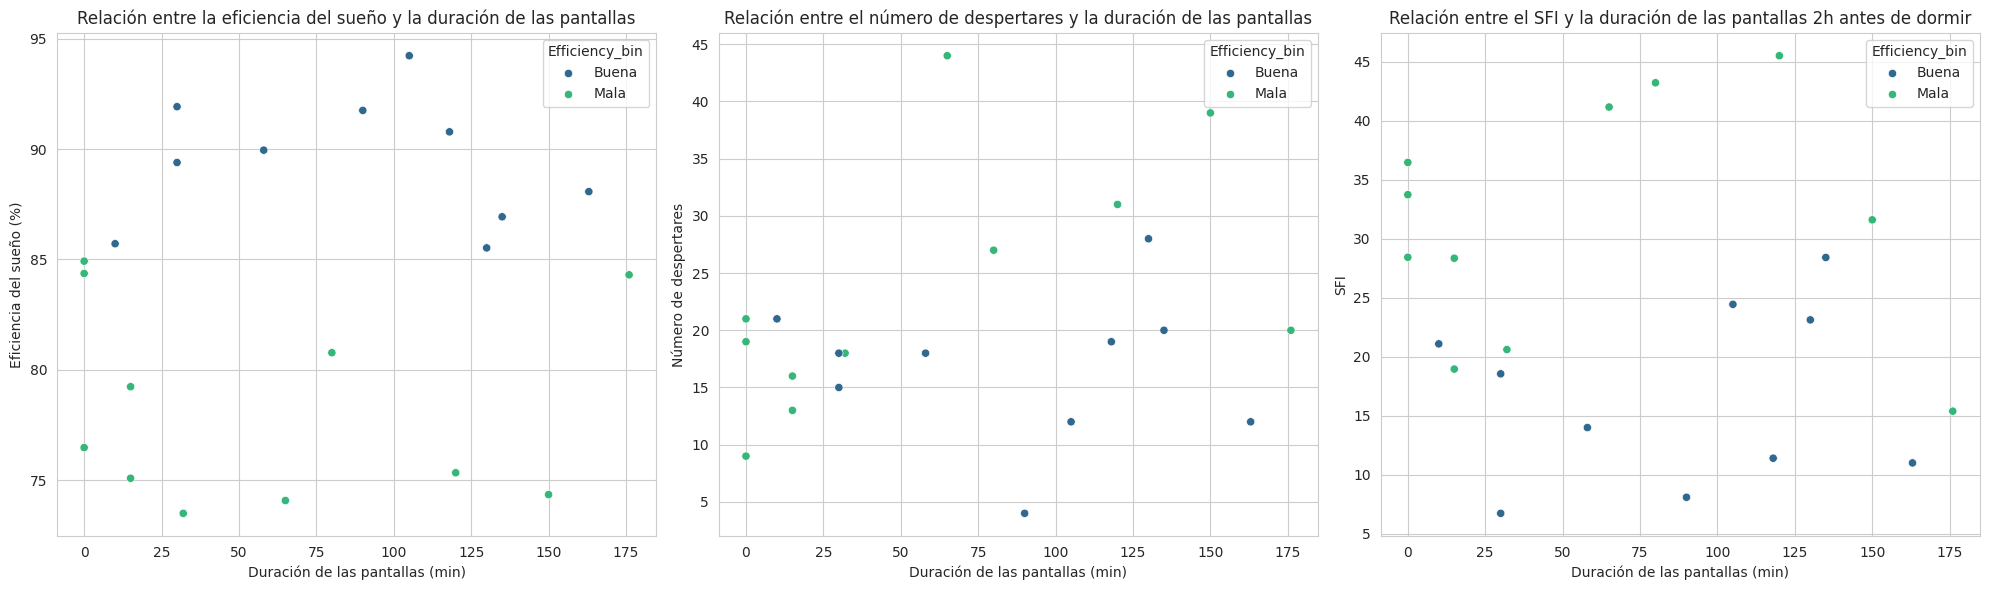

In [646]:
# Se configura el estilo
sns.set_style("whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 

# Se grafica la relación entre la eficiencia del sueño y la duración de las pantallas
sns.scatterplot(data=df_pantallas_efficiency, x='Total Screen Time (min)', y='Efficiency', hue='Efficiency_bin', palette='viridis', ax=axs[0])
axs[0].set_title("Relación entre la eficiencia del sueño y la duración de las pantallas")
axs[0].set_xlabel("Duración de las pantallas (min)")
axs[0].set_ylabel("Eficiencia del sueño (%)")

# Se grafica la relación entre el número de despertares y la duración de las pantallas
sns.scatterplot(data=df_pantallas_efficiency, x='Total Screen Time (min)', y='Number of Awakenings', hue='Efficiency_bin', palette='viridis', ax=axs[1])
axs[1].set_title("Relación entre el número de despertares y la duración de las pantallas")
axs[1].set_xlabel("Duración de las pantallas (min)")
axs[1].set_ylabel("Número de despertares")

# Se grafica la relación entre el SFI y la duración de las pantallas
sns.scatterplot(data=df_pantallas_efficiency, x='Total Screen Time (min)', y='Sleep Fragmentation Index', hue='Efficiency_bin', palette='viridis', ax=axs[2])
axs[2].set_title("Relación entre el SFI y la duración de las pantallas 2h antes de dormir")
axs[2].set_xlabel("Duración de las pantallas (min)")
axs[2].set_ylabel("SFI")

plt.tight_layout()
plt.show()

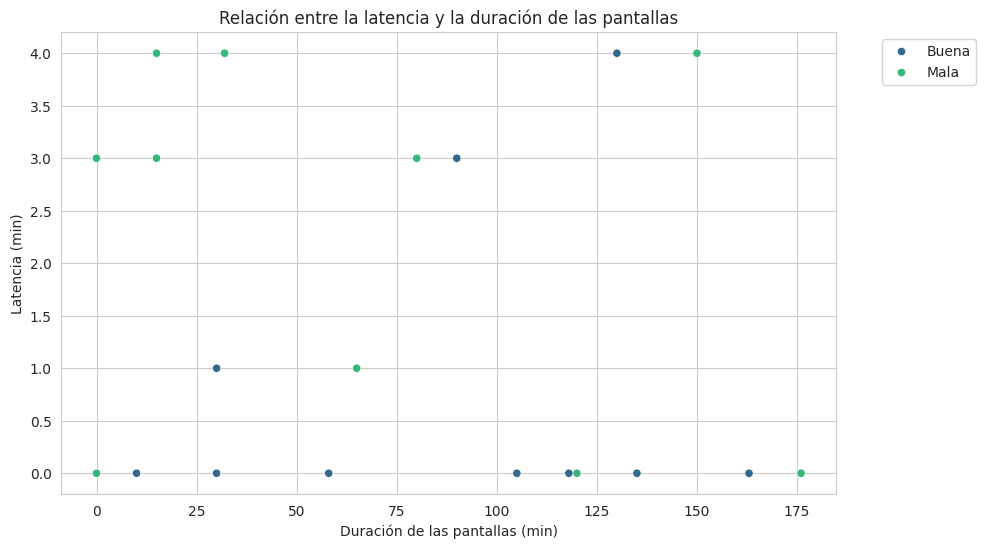

In [647]:
# Se configura el estilo
sns.set_style("whitegrid")

# Se muestra la relación entre la la latecia y la duración de las pantallas
fig, ax = plt.subplots(figsize=(10, 6))

# Se grafica la relación entre la eficiencia del sueño y la duración de las pantallas
sns.scatterplot(data=df_pantallas_efficiency, x='Total Screen Time (min)', y='Latency', hue='Efficiency_bin', palette='viridis', ax=ax)

plt.title("Relación entre la latencia y la duración de las pantallas")
plt.xlabel("Duración de las pantallas (min)")
plt.ylabel("Latencia (min)")

# Se coloca la leyenda fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Cafeina y sueño**

In [648]:
df_cafe = df_activity[df_activity['Activity'] == 'Cafeína']

n_registros = df_cafe.shape[0]

# Se crea un df vacio para almacenar los consumos de cafeína antes de irse a dormir
df_cafe_before_sleep = pd.DataFrame(columns=df_cafe.columns)

# Se eliminan los registros con registros posteriores al momento de irse a dormir ese usuario
for user in df_cafe['User'].unique():
    df_cafe_user = df_cafe[df_cafe['User'] == user]
    
    try:
        # Se obtiene la fecha y hora de irse a dormir
        in_bed_datetime = df_sleep[df_sleep['User'] == user]['In Bed DateTime'].values[0]
    except IndexError:
        print(f"El usuario {user} no tiene datos en df_sleep. Se omite.")
        continue

    # Se eliminan los registros con Start_datetime posteriores a in_bed_datetime
    df_cafe_user = df_cafe_user[df_cafe_user['Start_datetime'] < in_bed_datetime]

    # Se añaden al df de consumos de cafeína antes de dormir general
    df_cafe_before_sleep = pd.concat([df_cafe_before_sleep, df_cafe_user], ignore_index=True)
    
print(f"Se han eliminado {n_registros - df_cafe_before_sleep.shape[0]} registros de consumo de cafeína posteriores a irse a dormir")

Se han eliminado 0 registros de consumo de cafeína posteriores a irse a dormir


/tmp/ipykernel_25592/2557182013.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cafe_before_sleep = pd.concat([df_cafe_before_sleep, df_cafe_user], ignore_index=True)


In [649]:
df_cafe = df_cafe_before_sleep

In [650]:
# Se agrupan por usuario y se calcula la suma de la duración del consumo de café.
df_cafe = df_cafe.groupby('User').agg({'Duration': 'sum'}).reset_index()
df_cafe.rename(columns={'Duration': 'Total Coffee Duration'}, inplace=True)

# Se rellena con 0 los usuarios que no tienen consumos de café (salvo el user_11 que no tiene datos de sueño)
df_cafe = df_sleep[['User']].merge(df_cafe, on='User', how='left').fillna(pd.Timedelta(0))

df_cafe

,User,Total Coffee Duration
0,user_1,0 days 00:50:00
1,user_2,0 days 00:00:00
2,user_3,0 days 00:00:00
3,user_4,0 days 00:00:00
4,user_5,0 days 00:00:00
5,user_6,0 days 00:00:00
6,user_7,0 days 00:00:00
7,user_8,0 days 00:00:00
8,user_9,0 days 00:00:00
9,user_10,0 days 00:20:00


In [651]:
# Se une el df de cafeína con el df de sueño
df_sleep_1 = df_sleep.merge(df_cafe, on='User', how='right')

df_cafe_efficiency = df_sleep_1[['User', 'Efficiency', 'Total Coffee Duration', 'Number of Awakenings', 'Sleep Fragmentation Index', 'Latency']].copy()
df_cafe_efficiency.loc[:, 'Efficiency_bin'] = df_sleep_1['Efficiency_bin'].values

# Se convierte la Total Coffee Duration a minutos como enteros
df_cafe_efficiency.loc[:, 'Total Coffee Duration'] = df_cafe_efficiency['Total Coffee Duration'].apply(lambda x: int(x.total_seconds() / 60))
df_cafe_efficiency.rename(columns={'Total Coffee Duration': 'Total Coffee Duration (min)'}, inplace=True)

df_cafe_efficiency

/tmp/ipykernel_25592/3598211481.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[50  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  df_cafe_efficiency.loc[:, 'Total Coffee Duration'] = df_cafe_efficiency['Total Coffee Duration'].apply(lambda x: int(x.total_seconds() / 60))


,User,Efficiency,Total Coffee Duration (min),Number of Awakenings,Sleep Fragmentation Index,Latency,Efficiency_bin
0,user_1,89.95,50,18,14.0055,0.0,Buena
1,user_2,73.49,0,18,20.6160,4.0,Mala
2,user_3,79.23,0,16,18.9620,3.0,Mala
3,user_4,85.52,0,28,23.1330,4.0,Buena
4,user_5,85.71,0,21,21.1000,0.0,Buena
5,user_6,84.30,0,20,15.3950,0.0,Mala
6,user_7,75.33,0,31,45.5260,0.0,Mala
7,user_8,80.77,0,27,43.2340,3.0,Mala
8,user_9,91.75,0,4,8.0950,3.0,Buena
9,user_10,75.08,20,13,28.3610,4.0,Mala


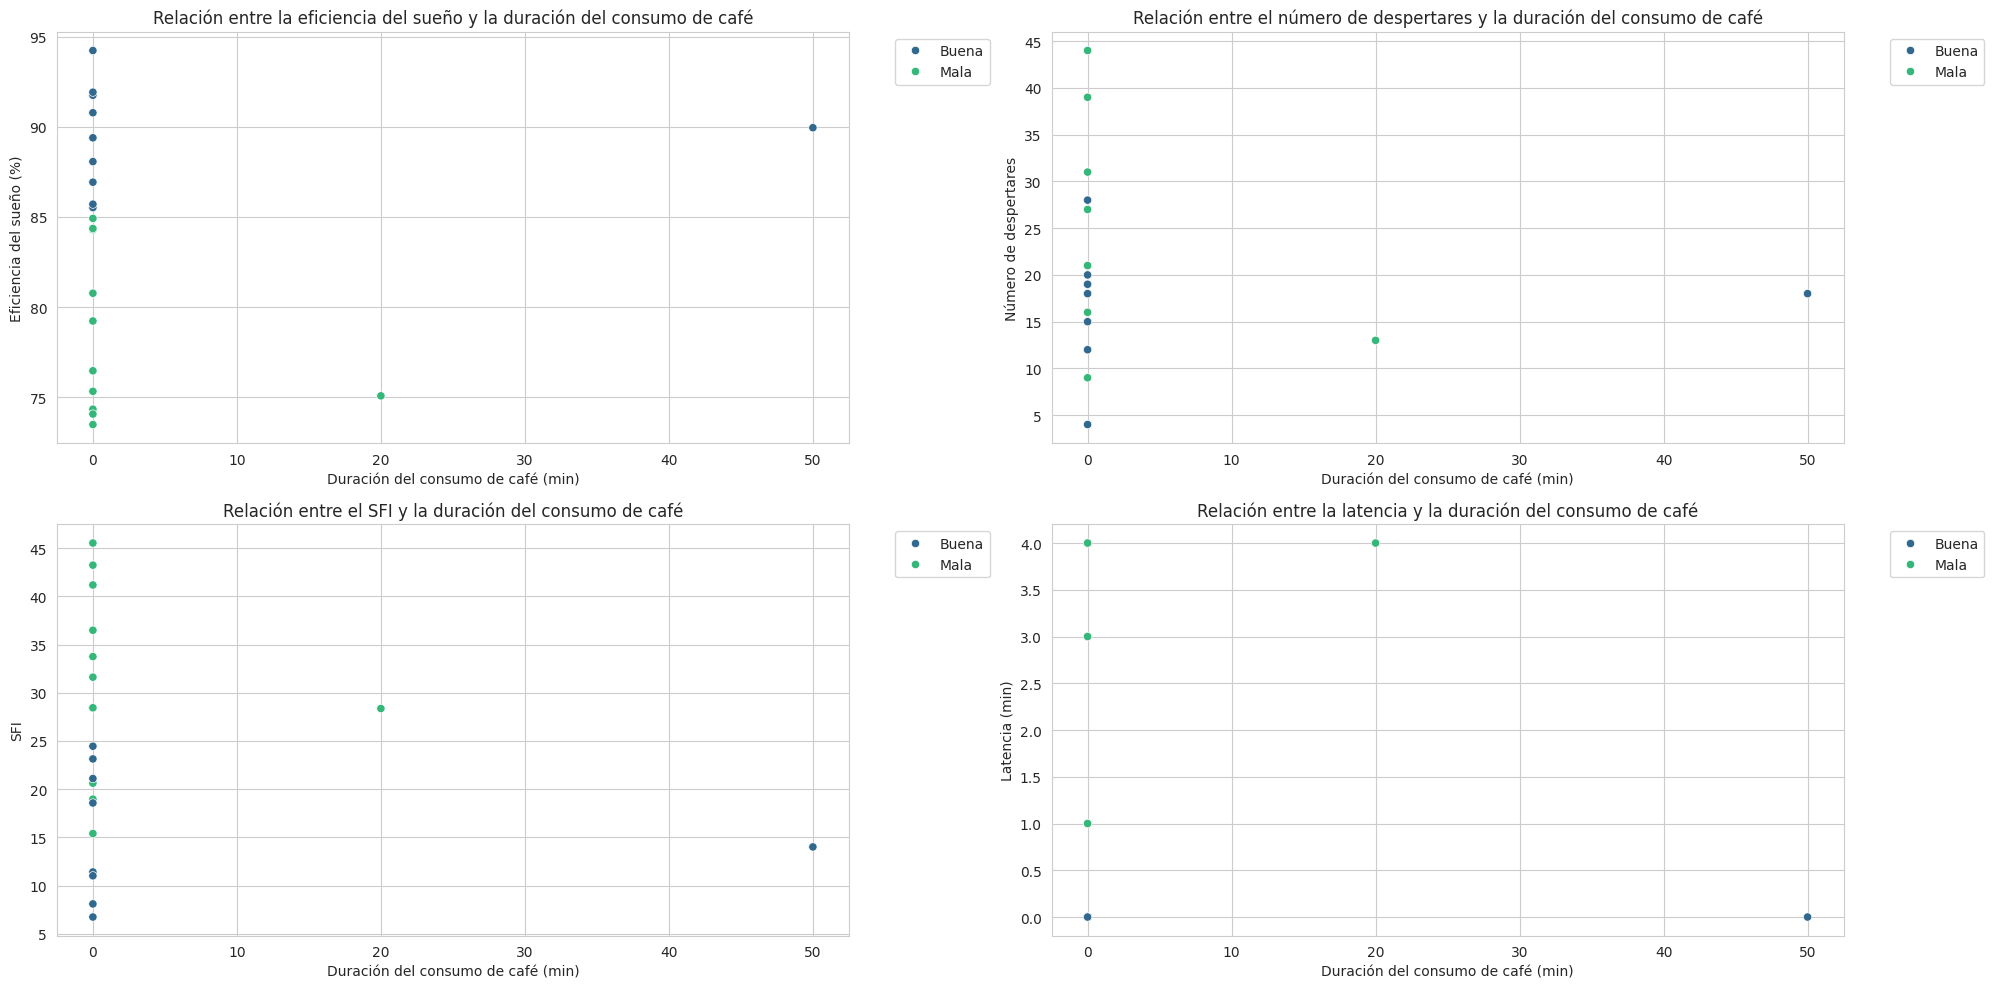

In [652]:
# Se configura el estilo
sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(20, 10)) 

# Se grafica la relación entre la eficiencia del sueño y la duración del consumo de café
sns.scatterplot(data=df_cafe_efficiency, x='Total Coffee Duration (min)', y='Efficiency', hue='Efficiency_bin', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title("Relación entre la eficiencia del sueño y la duración del consumo de café")
axs[0, 0].set_xlabel("Duración del consumo de café (min)")
axs[0, 0].set_ylabel("Eficiencia del sueño (%)")
axs[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Se grafica la relación entre el número de despertares y la duración del consumo de café
sns.scatterplot(data=df_cafe_efficiency, x='Total Coffee Duration (min)', y='Number of Awakenings', hue='Efficiency_bin', palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title("Relación entre el número de despertares y la duración del consumo de café")
axs[0, 1].set_xlabel("Duración del consumo de café (min)")
axs[0, 1].set_ylabel("Número de despertares")
axs[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Se grafica la relación entre el SFI y la duración del consumo de café
sns.scatterplot(data=df_cafe_efficiency, x='Total Coffee Duration (min)', y='Sleep Fragmentation Index', hue='Efficiency_bin', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title("Relación entre el SFI y la duración del consumo de café")
axs[1, 0].set_xlabel("Duración del consumo de café (min)")
axs[1, 0].set_ylabel("SFI")
axs[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Se grafica la relación entre la latencia y la duración del consumo de café
sns.scatterplot(data=df_cafe_efficiency, x='Total Coffee Duration (min)', y='Latency', hue='Efficiency_bin', palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title("Relación entre la latencia y la duración del consumo de café")
axs[1, 1].set_xlabel("Duración del consumo de café (min)")
axs[1, 1].set_ylabel("Latencia (min)")
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Sentado y Tumbado vs calidad del sueño**

In [657]:
df_reposo = df_activity[df_activity['Activity'].isin(['Tumbado', 'Sentado'])]

n_registros = df_reposo.shape[0]

# Se crea un df vacio para almacenar los consumos de cafeína antes de irse a dormir
df_reposo_before_sleep = pd.DataFrame(columns=df_reposo.columns)

# Se eliminan los registros con registros posteriores al momento de irse a dormir ese usuario
for user in df_reposo['User'].unique():
    df_reposo_user = df_reposo[df_reposo['User'] == user]
    
    try:
        # Se obtiene la fecha y hora de irse a dormir
        in_bed_datetime = df_sleep[df_sleep['User'] == user]['In Bed DateTime'].values[0]
    except IndexError:
        print(f"El usuario {user} no tiene datos en df_sleep. Se omite.")
        continue

    # Se eliminan los registros con Start_datetime posteriores a in_bed_datetime
    df_reposo_user = df_reposo_user[df_reposo_user['Start_datetime'] < in_bed_datetime]

    # Se añaden al df de consumos de cafeína antes de dormir general
    df_reposo_before_sleep = pd.concat([df_reposo_before_sleep, df_reposo_user], ignore_index=True)
    
print(f"Se han eliminado {n_registros - df_reposo_before_sleep.shape[0]} registros de consumo de cafeína posteriores a irse a dormir")

El usuario user_11 no tiene datos en df_sleep. Se omite.
Se han eliminado 45 registros de consumo de cafeína posteriores a irse a dormir


/tmp/ipykernel_25592/3795633547.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_reposo_before_sleep = pd.concat([df_reposo_before_sleep, df_reposo_user], ignore_index=True)


In [658]:
df_reposo = df_reposo_before_sleep

In [659]:
# Se agrupan por usuario y se calcula la suma de la duración del reposo.
df_reposo = df_reposo.groupby('User').agg({'Duration': 'sum'}).reset_index()
df_reposo.rename(columns={'Duration': 'Total Rest Duration'}, inplace=True)

# Se rellena con 0 los usuarios que no tienen consumos de cafeína (salvo el user_11 que no tiene datos de sueño)
df_reposo = df_sleep[['User']].merge(df_reposo, on='User', how='left').fillna(pd.Timedelta(0))

df_reposo

,User,Total Rest Duration
0,user_1,0 days 05:07:00
1,user_2,0 days 02:05:00
2,user_3,0 days 06:50:00
3,user_4,0 days 02:35:00
4,user_5,0 days 05:50:00
5,user_6,0 days 04:19:00
6,user_7,0 days 08:35:00
7,user_8,1 days 06:40:00
8,user_9,0 days 22:30:00
9,user_10,0 days 07:00:00


In [660]:

# Se une el df de reposo con el df de sueño
df_sleep_1 = df_sleep.merge(df_reposo, on='User', how='right')

df_reposo_efficiency = df_sleep_1[['User', 'Efficiency', 'Total Rest Duration', 'Number of Awakenings', 'Sleep Fragmentation Index', 'Latency']].copy()
df_reposo_efficiency.loc[:, 'Efficiency_bin'] = df_sleep_1['Efficiency_bin'].values

# Se convierte la Total Rest Duration a minutos como enteros
df_reposo_efficiency.loc[:, 'Total Rest Duration'] = df_reposo_efficiency['Total Rest Duration'].apply(lambda x: int(x.total_seconds() / 60))
df_reposo_efficiency.rename(columns={'Total Rest Duration': 'Total Rest Duration (min)'}, inplace=True)

df_reposo_efficiency

/tmp/ipykernel_25592/3134353095.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 307  125  410  155  350  259  515 1840 1350  420  365  600  184  360
  510  383  250  355    0 1384  510]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  df_reposo_efficiency.loc[:, 'Total Rest Duration'] = df_reposo_efficiency['Total Rest Duration'].apply(lambda x: int(x.total_seconds() / 60))


,User,Efficiency,Total Rest Duration (min),Number of Awakenings,Sleep Fragmentation Index,Latency,Efficiency_bin
0,user_1,89.95,307,18,14.0055,0.0,Buena
1,user_2,73.49,125,18,20.6160,4.0,Mala
2,user_3,79.23,410,16,18.9620,3.0,Mala
3,user_4,85.52,155,28,23.1330,4.0,Buena
4,user_5,85.71,350,21,21.1000,0.0,Buena
5,user_6,84.30,259,20,15.3950,0.0,Mala
6,user_7,75.33,515,31,45.5260,0.0,Mala
7,user_8,80.77,1840,27,43.2340,3.0,Mala
8,user_9,91.75,1350,4,8.0950,3.0,Buena
9,user_10,75.08,420,13,28.3610,4.0,Mala


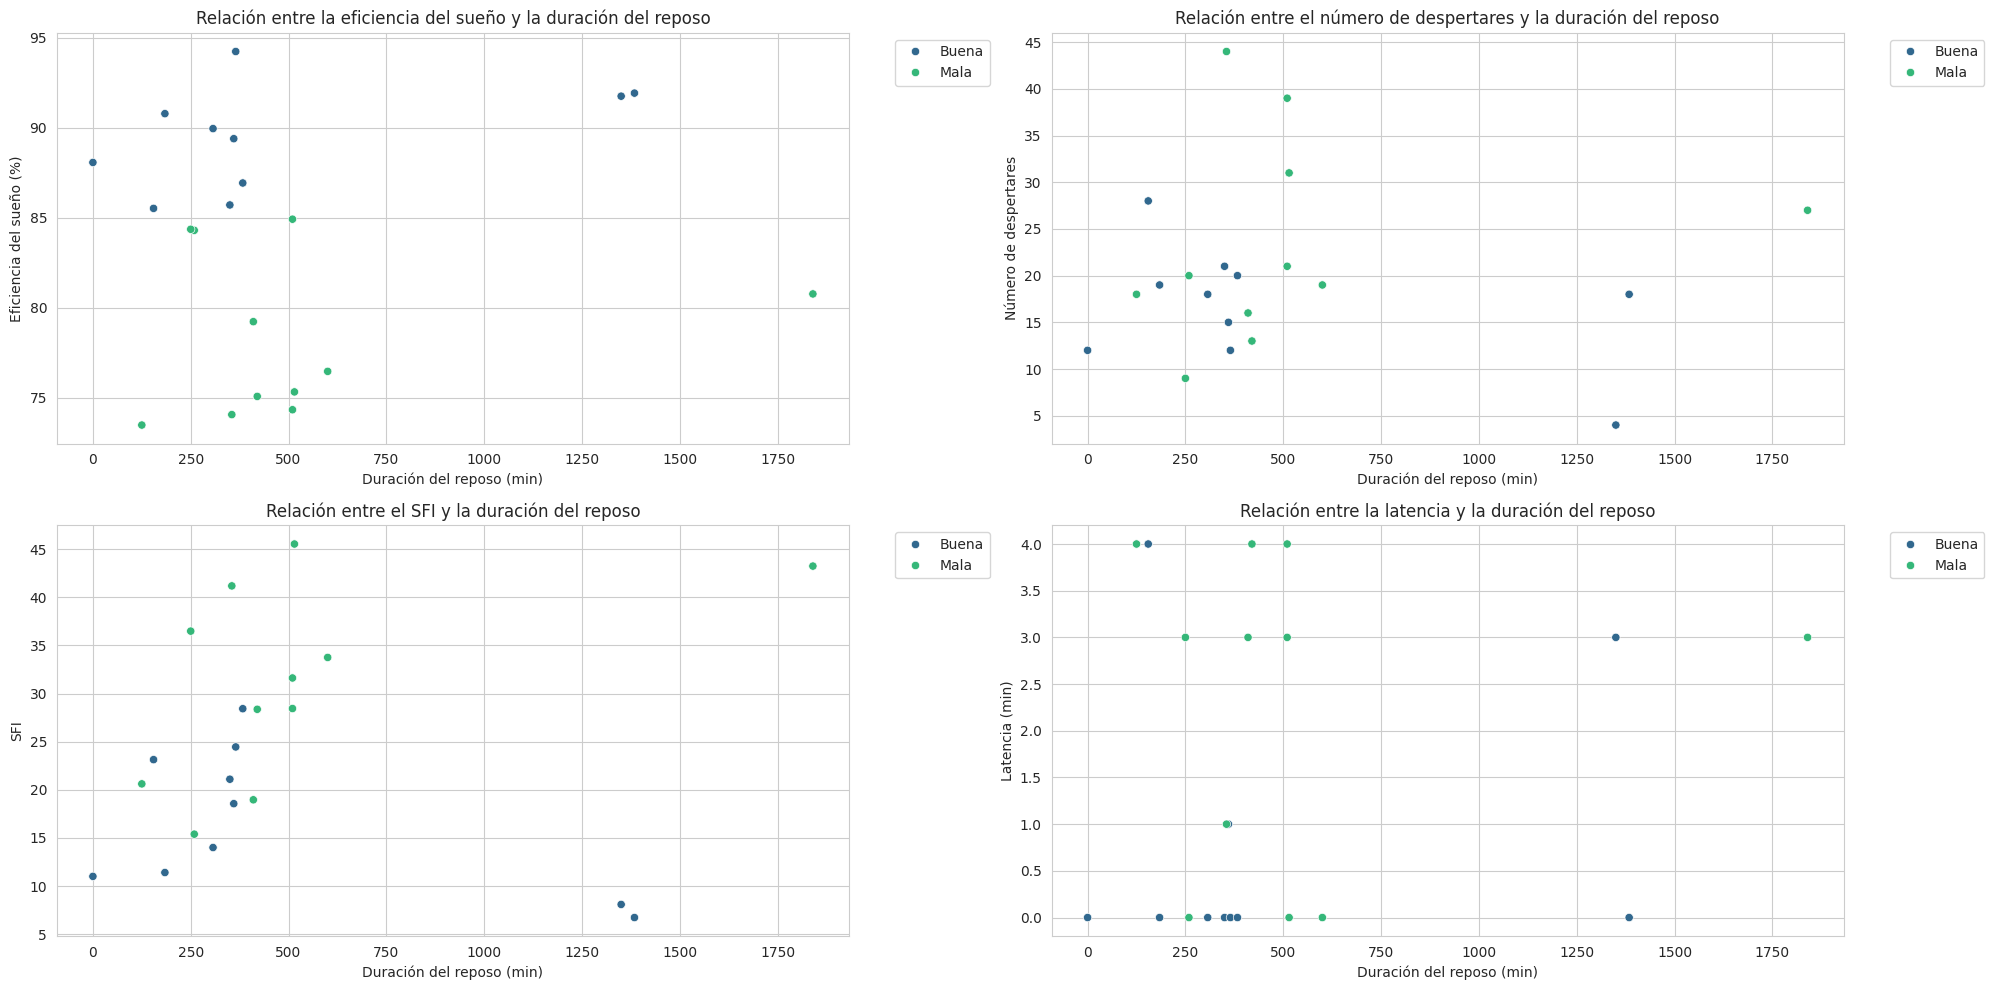

In [661]:
# Se configura el estilo
sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(20, 10)) 

# Se grafica la relación entre la eficiencia del sueño y la duración del reposo
sns.scatterplot(data=df_reposo_efficiency, x='Total Rest Duration (min)', y='Efficiency', hue='Efficiency_bin', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title("Relación entre la eficiencia del sueño y la duración del reposo")
axs[0, 0].set_xlabel("Duración del reposo (min)")
axs[0, 0].set_ylabel("Eficiencia del sueño (%)")
axs[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Se grafica la relación entre el número de despertares y la duración del reposo
sns.scatterplot(data=df_reposo_efficiency, x='Total Rest Duration (min)', y='Number of Awakenings', hue='Efficiency_bin', palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title("Relación entre el número de despertares y la duración del reposo")
axs[0, 1].set_xlabel("Duración del reposo (min)")
axs[0, 1].set_ylabel("Número de despertares")
axs[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Se grafica la relación entre el SFI y la duración del reposo
sns.scatterplot(data=df_reposo_efficiency, x='Total Rest Duration (min)', y='Sleep Fragmentation Index', hue='Efficiency_bin', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title("Relación entre el SFI y la duración del reposo")
axs[1, 0].set_xlabel("Duración del reposo (min)")
axs[1, 0].set_ylabel("SFI")
axs[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Se grafica la relación entre la latencia y la duración del reposo
sns.scatterplot(data=df_reposo_efficiency, x='Total Rest Duration (min)', y='Latency', hue='Efficiency_bin', palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title("Relación entre la latencia y la duración del reposo")
axs[1, 1].set_xlabel("Duración del reposo (min)")
axs[1, 1].set_ylabel("Latencia (min)")
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()